# Load image and generate landmarks

In [31]:
import os
import math
import numpy as np
import face_recognition


LABELS = ['22q11','Angelman','Apert','CDL','Down','FragileX','Marfan','Progeria','Sotos','TreacherCollins','Turner','Williams']


def load_dataset(setPath):
    X = []
    y = []

    for label in LABELS:
        directory = os.path.join(setPath,label)
        for f in os.listdir(directory):
            path = os.path.join(directory,f)
            
            if os.path.isfile(path) and f != 'desktop.ini':
                
                # Extract landmarks
                image = face_recognition.load_image_file(path)
                face_locations = face_recognition.face_locations(image)
                face_landmarks_list = face_recognition.face_landmarks(image)

                # Iterate through detected faces
                keypoints = []
                for i in range(0,len(face_landmarks_list)):
                    (top,right,bottom,left) = face_locations[i]
                    landmarks = face_landmarks_list[i]
                    
                    height = (bottom - top)
                    width = (right - left)
                    
                    cY = top + height/2.0
                    cX = left + width/2.0
                    
                    # Center and append to points list
                    first = True
                    transform = None
                    points = []
                    for featureType in landmarks.keys():
                        for point in landmarks[featureType]:
                            
                            if first: # convert first point distance to be 1
                                first = False
                                transform = 1.0 / math.sqrt((point[0] - cY)**2 + (point[1] - cX)**2)
                            
                            rectifiedPoint = [(point[0]- cY) / transform,(point[1] - cX) / transform]
                            
                            points = points + rectifiedPoint
    
                    # Store result
                    keypoints.append(points)

                # Append to dataset
                for facePoints in keypoints:
                    X.append(facePoints)
                    y.append(label)
    
    return np.array(X), np.array(y)

In [32]:
X_test, y_test = load_dataset('./data/raw/Test')
print(X_test.shape)
print(y_test.shape)

(312, 144)
(312,)


In [33]:
X_train, y_train = load_dataset('./data/raw/Train')
print(X_train.shape)
print(y_train.shape)

(1023, 144)
(1023,)


## SVM Approach

In [34]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-0.00180121  0.00020478 -0.00145854 ... -0.00046    -0.00039503
   0.00136359]
 [ 0.0032865  -0.0018114  -0.00624242 ... -0.00731118  0.00406841
  -0.0008509 ]
 [-0.00507331  0.00243582 -0.0021989  ... -0.00431204  0.00047811
  -0.00479425]
 ...
 [ 0.00217365 -0.00321037 -0.00187862 ... -0.00506879 -0.00146064
   0.00079265]
 [ 0.00165298  0.0058337   0.00128671 ... -0.00476309  0.0016526
  -0.00114428]
 [-0.00303639 -0.00798161  0.00032962 ...  0.00071084 -0.00071636
  -0.00474815]]
[-7.51356340e-05 -4.24482368e-03 -1.24999328e-03 -3.07076915e-03
 -3.37396155e-03  1.08687223e-03 -2.28912539e-04 -1.53287043e-03
 -5.45991530e-04 -1.37777088e-03 -1.30960979e-04 -1.43059672e-03]


/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.6500488758553274


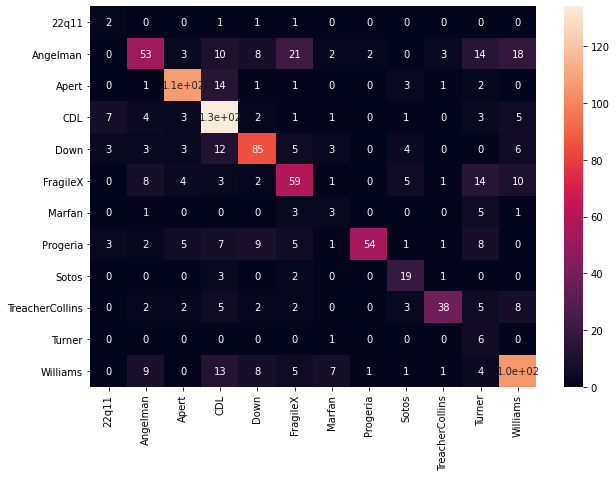

In [36]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.5192307692307693


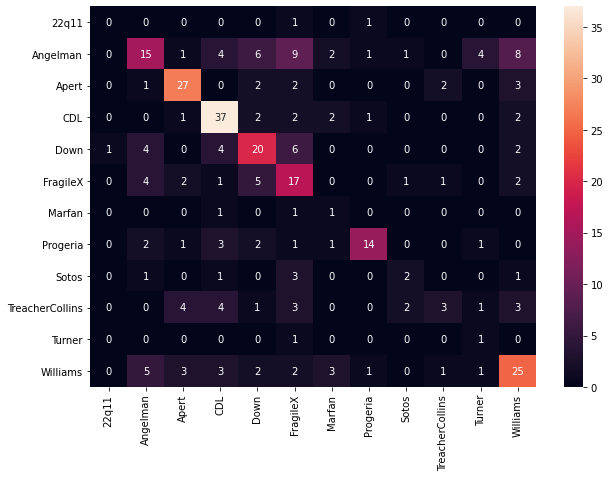

In [38]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Neural Network Approach

In [39]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 281, loss = 2.21424222
Iteration 282, loss = 2.21408902
Iteration 283, loss = 2.21394408
Iteration 284, loss = 2.21379987
Iteration 285, loss = 2.21359070
Iteration 286, loss = 2.21338506
Iteration 287, loss = 2.21319052
Iteration 288, loss = 2.21301955
Iteration 289, loss = 2.21285784
Iteration 290, loss = 2.21270173
Iteration 291, loss = 2.21252956
Iteration 292, loss = 2.21238901
Iteration 293, loss = 2.21220445
Iteration 294, loss = 2.21205607
Iteration 295, loss = 2.21186683
Iteration 296, loss = 2.21169744
Iteration 297, loss = 2.21152773
Iteration 298, loss = 2.21135889
Iteration 299, loss = 2.21121385
Iteration 300, loss = 2.21105518
Iteration 301, loss = 2.21089582
Iteration 302, loss = 2.21075948
Iteration 303, loss = 2.21062950
Iteration 304, loss = 2.21048960
Iteration 305, loss = 2.21034225
Iteration 306, loss = 2.21020149
Iteration 307, loss = 2.21004369
Iteration 308, loss = 2.20990435
Iteration 309, loss = 2.20976521
Iteration 310, loss = 2.20963098
Iteration 

Iteration 531, loss = 2.19441218
Iteration 532, loss = 2.19438528
Iteration 533, loss = 2.19435465
Iteration 534, loss = 2.19433245
Iteration 535, loss = 2.19429747
Iteration 536, loss = 2.19426238
Iteration 537, loss = 2.19424434
Iteration 538, loss = 2.19420081
Iteration 539, loss = 2.19418124
Iteration 540, loss = 2.19414767
Iteration 541, loss = 2.19412390
Iteration 542, loss = 2.19407677
Iteration 543, loss = 2.19406070
Iteration 544, loss = 2.19401938
Iteration 545, loss = 2.19400851
Iteration 546, loss = 2.19397296
Iteration 547, loss = 2.19395778
Iteration 548, loss = 2.19394197
Iteration 549, loss = 2.19392450
Iteration 550, loss = 2.19387282
Iteration 551, loss = 2.19386211
Iteration 552, loss = 2.19382210
Iteration 553, loss = 2.19378039
Iteration 554, loss = 2.19379267
Iteration 555, loss = 2.19375099
Iteration 556, loss = 2.19371905
Iteration 557, loss = 2.19368983
Iteration 558, loss = 2.19365935
Iteration 559, loss = 2.19361629
Iteration 560, loss = 2.19358145
Iteration 

Iteration 785, loss = 2.19085935
Iteration 786, loss = 2.19084881
Iteration 787, loss = 2.19084984
Iteration 788, loss = 2.19083807
Iteration 789, loss = 2.19083181
Iteration 790, loss = 2.19082074
Iteration 791, loss = 2.19081638
Iteration 792, loss = 2.19082391
Iteration 793, loss = 2.19080955
Iteration 794, loss = 2.19080064
Iteration 795, loss = 2.19078866
Iteration 796, loss = 2.19078917
Iteration 797, loss = 2.19078259
Iteration 798, loss = 2.19079068
Iteration 799, loss = 2.19077782
Iteration 800, loss = 2.19079810
Iteration 801, loss = 2.19078024
Iteration 802, loss = 2.19078871
Iteration 803, loss = 2.19078029
Iteration 804, loss = 2.19079016
Iteration 805, loss = 2.19077820
Iteration 806, loss = 2.19078202
Iteration 807, loss = 2.19075805
Iteration 808, loss = 2.19074976
Iteration 809, loss = 2.19074596
Iteration 810, loss = 2.19072048
Iteration 811, loss = 2.19072331
Iteration 812, loss = 2.19071509
Iteration 813, loss = 2.19070053
Iteration 814, loss = 2.19070190
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.1603128054740958


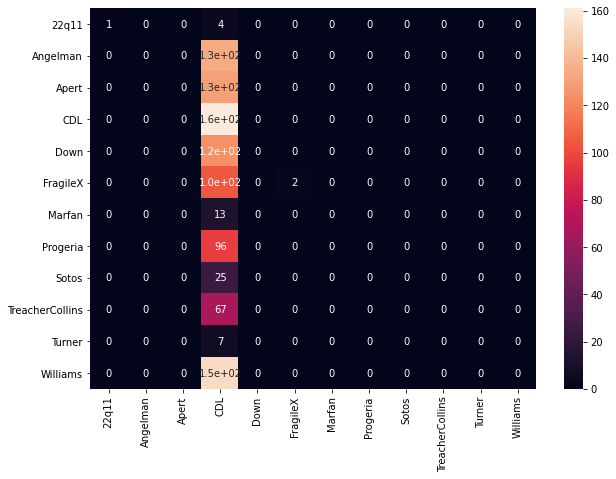

In [41]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.15064102564102563


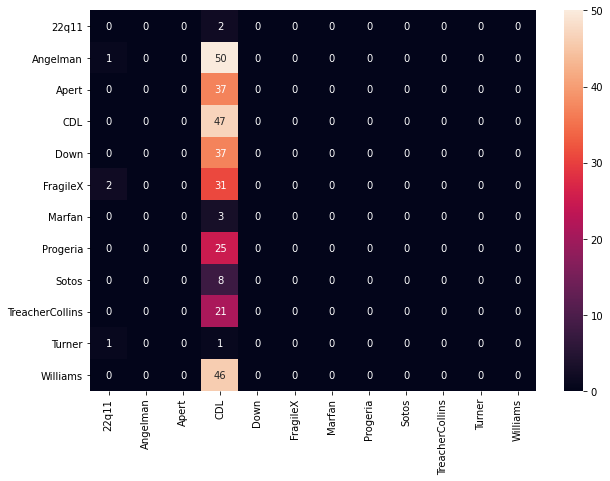

In [43]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## PCA SVM

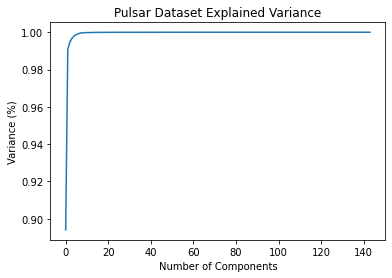

In [44]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [46]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train_pca, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 1.73251122e-05 -1.23266918e-06 -1.59364199e-05  3.33014116e-05
   5.25273950e-06  1.48091827e-05  4.34566043e-05  4.45104174e-05
   6.13353094e-05 -2.81502472e-05]
 [ 2.71527363e-06  2.95963130e-05 -3.62071852e-05  1.53097828e-05
  -2.50358951e-05  7.76258909e-05 -3.52703920e-08 -4.71328021e-05
   2.47708950e-05  1.11766761e-04]
 [-1.93658688e-05 -8.64603320e-06 -3.81334584e-06 -2.37937029e-05
   4.02829562e-06 -6.54187153e-05  4.66395268e-05  7.82797975e-05
  -1.02727632e-05  2.00018046e-05]
 [ 2.18048612e-06  3.04139673e-05  1.22877217e-05  2.52813888e-05
  -3.55453829e-05 -5.21702199e-05 -3.10156935e-05  3.54016727e-05
   1.38281393e-04 -5.08300809e-05]
 [-1.33504753e-05  4.67489351e-07  1.27000272e-05  5.15658268e-05
  -8.08355608e-06 -1.07231547e-05 -6.52021684e-06  1.08930088e-04
  -1.42784540e-06  8.27742879e-05]
 [ 1.39241804e-05  4.89606962e-06  5.40804362e-06  3.93818355e-06
  -7.23965126e-06  2.52611604e-05  7.50574867e-06  7.40574038e-05
   8.71230999e-05 -9.16864041e-06

/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.15542521994134897


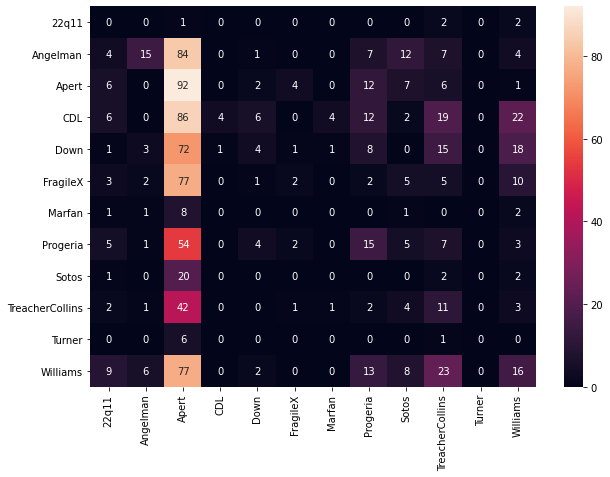

In [48]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.1346153846153846


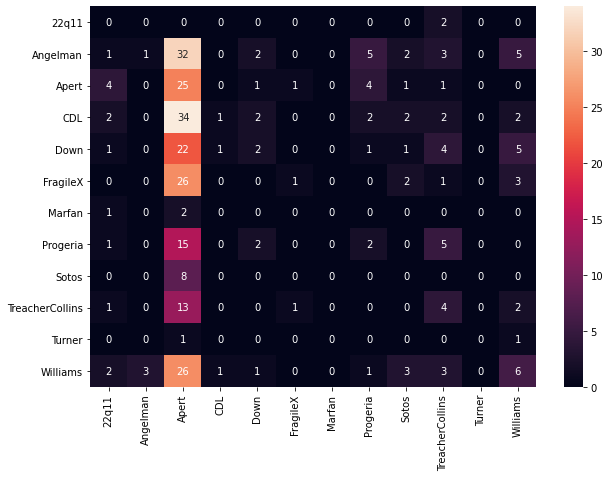

In [50]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## PCA Neural Network

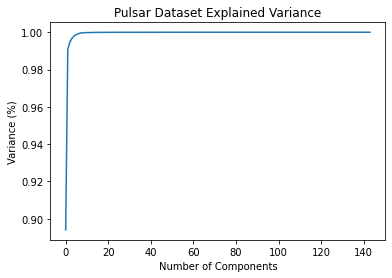

In [51]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [53]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train_pca, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 326, loss = inf
Iteration 327, loss = 43.99338778
Iteration 328, loss = 46.69472692
Iteration 329, loss = 46.88020375
Iteration 330, loss = 48.51551403
Iteration 331, loss = inf
Iteration 332, loss = 53.73464388
Iteration 333, loss = 46.57957511
Iteration 334, loss = 52.01296806
Iteration 335, loss = 63.70308427
Iteration 336, loss = inf
Iteration 337, loss = inf
Iteration 338, loss = inf
Iteration 339, loss = inf
Iteration 340, loss = inf
Iteration 341, loss = 45.07092260
Iteration 342, loss = 55.52698960
Iteration 343, loss = inf
Iteration 344, loss = inf
Iteration 345, loss = inf
Iteration 346, loss = inf
Iteration 347, loss = inf
Iteration 348, loss = inf
Iteration 349, loss = 39.65243436
Iteration 350, loss = inf
Iteration 351, loss = inf
Iteration 352, loss = inf
Iteration 353, loss = inf
Iteration 354, loss = inf
Iteration 355, loss = inf
Iteration 356, loss = inf
Iteration 357, loss = inf
Iteration 358, loss = inf
Iteration 359, loss = inf
Iteration 360, loss = inf
It

Iteration 634, loss = 25.81169437
Iteration 635, loss = inf
Iteration 636, loss = 28.56730767
Iteration 637, loss = 38.44864470
Iteration 638, loss = 47.65550466
Iteration 639, loss = 48.71570485
Iteration 640, loss = 45.23650174
Iteration 641, loss = 48.90537941
Iteration 642, loss = 42.40319617
Iteration 643, loss = 64.19797400
Iteration 644, loss = 72.39907288
Iteration 645, loss = 50.51968010
Iteration 646, loss = 44.60926986
Iteration 647, loss = 45.13008566
Iteration 648, loss = inf
Iteration 649, loss = inf
Iteration 650, loss = inf
Iteration 651, loss = inf
Iteration 652, loss = inf
Iteration 653, loss = inf
Iteration 654, loss = inf
Iteration 655, loss = inf
Iteration 656, loss = inf
Iteration 657, loss = inf
Iteration 658, loss = inf
Iteration 659, loss = inf
Iteration 660, loss = 48.99728238
Iteration 661, loss = inf
Iteration 662, loss = 43.51969608
Iteration 663, loss = 57.95651287
Iteration 664, loss = 57.73070169
Iteration 665, loss = 57.14497881
Iteration 666, loss = 53

Iteration 910, loss = inf
Iteration 911, loss = inf
Iteration 912, loss = inf
Iteration 913, loss = inf
Iteration 914, loss = inf
Iteration 915, loss = inf
Iteration 916, loss = inf
Iteration 917, loss = inf
Iteration 918, loss = inf
Iteration 919, loss = 25.63317884
Iteration 920, loss = 27.27676226
Iteration 921, loss = inf
Iteration 922, loss = inf
Iteration 923, loss = inf
Iteration 924, loss = inf
Iteration 925, loss = inf
Iteration 926, loss = inf
Iteration 927, loss = 29.54829377
Iteration 928, loss = 27.68544543
Iteration 929, loss = inf
Iteration 930, loss = 26.24330921
Iteration 931, loss = 24.95486091
Iteration 932, loss = inf
Iteration 933, loss = inf
Iteration 934, loss = inf
Iteration 935, loss = 19.35224499
Iteration 936, loss = inf
Iteration 937, loss = 20.51502702
Iteration 938, loss = 16.42724727
Iteration 939, loss = inf
Iteration 940, loss = 19.20411590
Iteration 941, loss = 23.43277651
Iteration 942, loss = 21.54752788
Iteration 943, loss = 22.51403296
Iteration 94

Iteration 1173, loss = 22.25121033
Iteration 1174, loss = 19.85285264
Iteration 1175, loss = 17.42146202
Iteration 1176, loss = 14.96192265
Iteration 1177, loss = 23.25152528
Iteration 1178, loss = 25.68792209
Iteration 1179, loss = 16.59026312
Iteration 1180, loss = 15.85872785
Iteration 1181, loss = 22.57128074
Iteration 1182, loss = 14.77554988
Iteration 1183, loss = 12.54962325
Iteration 1184, loss = inf
Iteration 1185, loss = 21.25654074
Iteration 1186, loss = inf
Iteration 1187, loss = 17.46374488
Iteration 1188, loss = 14.59899242
Iteration 1189, loss = 10.35526395
Iteration 1190, loss = 11.79018555
Iteration 1191, loss = 10.00121504
Iteration 1192, loss = 9.65407240
Iteration 1193, loss = 11.73145645
Iteration 1194, loss = 16.13980879
Iteration 1195, loss = 15.27692411
Iteration 1196, loss = 26.32267498
Iteration 1197, loss = 19.46456236
Iteration 1198, loss = 22.10272935
Iteration 1199, loss = 21.30434641
Iteration 1200, loss = 16.35610487
Iteration 1201, loss = 14.88202666
It

Iteration 1420, loss = 13.09810852
Iteration 1421, loss = 13.94816966
Iteration 1422, loss = 12.05647833
Iteration 1423, loss = 8.78838904
Iteration 1424, loss = 9.52389153
Iteration 1425, loss = 9.72497745
Iteration 1426, loss = 12.15011756
Iteration 1427, loss = 13.38698598
Iteration 1428, loss = 10.84129803
Iteration 1429, loss = 8.77428991
Iteration 1430, loss = 8.50476117
Iteration 1431, loss = 6.09230241
Iteration 1432, loss = 9.33153330
Iteration 1433, loss = 14.92040292
Iteration 1434, loss = 21.42611286
Iteration 1435, loss = 16.51622228
Iteration 1436, loss = 20.77379770
Iteration 1437, loss = 20.80516651
Iteration 1438, loss = 13.82541080
Iteration 1439, loss = 14.56853322
Iteration 1440, loss = 13.79947050
Iteration 1441, loss = 17.95642170
Iteration 1442, loss = 16.19707664
Iteration 1443, loss = 16.36064166
Iteration 1444, loss = 14.62882318
Iteration 1445, loss = 16.71425942
Iteration 1446, loss = 18.64894100
Iteration 1447, loss = 15.84003743
Iteration 1448, loss = 22.8

Iteration 1684, loss = 8.62598050
Iteration 1685, loss = 14.18181594
Iteration 1686, loss = 12.60295169
Iteration 1687, loss = 12.14130946
Iteration 1688, loss = 13.93369572
Iteration 1689, loss = 8.76531283
Iteration 1690, loss = 8.00234965
Iteration 1691, loss = 6.80451287
Iteration 1692, loss = 11.41161398
Iteration 1693, loss = 12.54555703
Iteration 1694, loss = 11.82817715
Iteration 1695, loss = 18.27582424
Iteration 1696, loss = 11.24359095
Iteration 1697, loss = 7.45988345
Iteration 1698, loss = 6.57989675
Iteration 1699, loss = 5.97146894
Iteration 1700, loss = 7.48073749
Iteration 1701, loss = 8.19026782
Iteration 1702, loss = 8.48126245
Iteration 1703, loss = 9.00892773
Iteration 1704, loss = 7.20886033
Iteration 1705, loss = 8.79981894
Iteration 1706, loss = 8.31048024
Iteration 1707, loss = 8.30506097
Iteration 1708, loss = 8.17793437
Iteration 1709, loss = 6.36232273
Iteration 1710, loss = 5.31334702
Iteration 1711, loss = 8.17893892
Iteration 1712, loss = 6.88246328
Itera

Iteration 1936, loss = 6.30639617
Iteration 1937, loss = 6.66507935
Iteration 1938, loss = 5.26547256
Iteration 1939, loss = 5.98308951
Iteration 1940, loss = 7.50773296
Iteration 1941, loss = 8.24465314
Iteration 1942, loss = 7.68622718
Iteration 1943, loss = 9.64186958
Iteration 1944, loss = 6.69494701
Iteration 1945, loss = 5.88260718
Iteration 1946, loss = 7.01194777
Iteration 1947, loss = 5.38987233
Iteration 1948, loss = 5.04119405
Iteration 1949, loss = 4.25794099
Iteration 1950, loss = 6.46183168
Iteration 1951, loss = 5.97884639
Iteration 1952, loss = 5.52801492
Iteration 1953, loss = 7.94020251
Iteration 1954, loss = 6.37143741
Iteration 1955, loss = 7.38482285
Iteration 1956, loss = 14.33979731
Iteration 1957, loss = 14.02923300
Iteration 1958, loss = 8.76714437
Iteration 1959, loss = 9.75815015
Iteration 1960, loss = 9.37155966
Iteration 1961, loss = 6.46309250
Iteration 1962, loss = 6.33402336
Iteration 1963, loss = 4.97980798
Iteration 1964, loss = 4.96393245
Iteration 19

/home/curt/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.5190615835777126


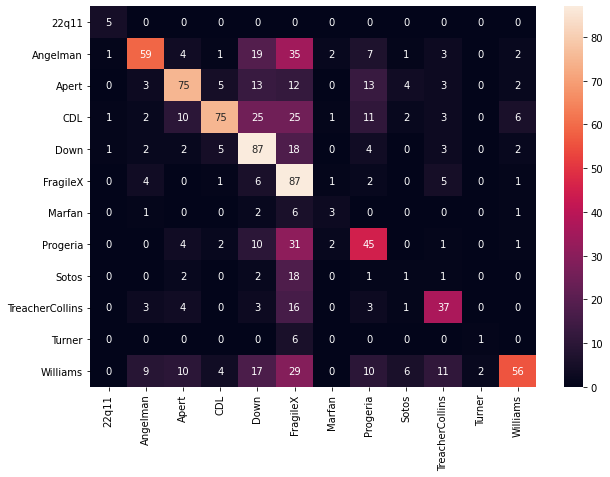

In [55]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.2948717948717949


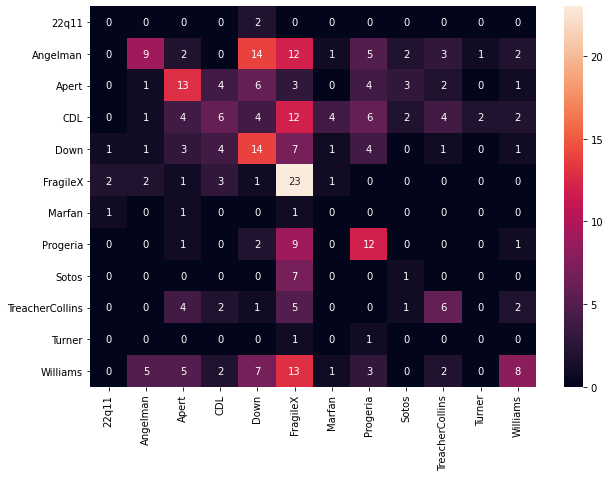

In [57]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)